# dataset load wine
En sklearn podes encontrar varios datasets: load y tabulador y te muestra los distintos datasets

In [136]:
from sklearn.datasets import load_wine 

Obtenemos Info:

In [137]:
load_wine?

Tiene 3 clases(59,71,48 respectivamente). 178 datos en total, no hay variables categoricas para describir los vinos. 

In [138]:
a = load_wine  #guardamos el DF

In [139]:
X,y = load_wine(as_frame=True, return_X_y=True)

In [140]:
X.head() #Me muestra el Data Frame

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [141]:
y


0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

In [142]:
# activar un ejemplo Binario
y[y == 2] = 0 #llevo la clase 2 al cero: convertir el problema en dos clases. 

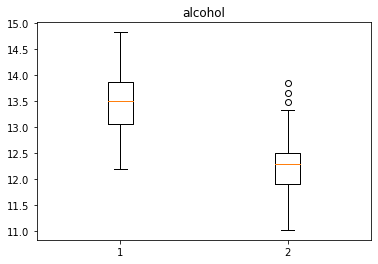

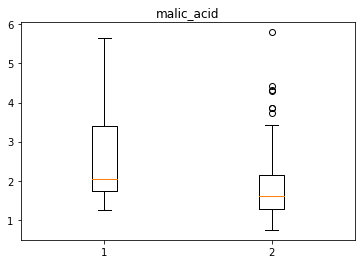

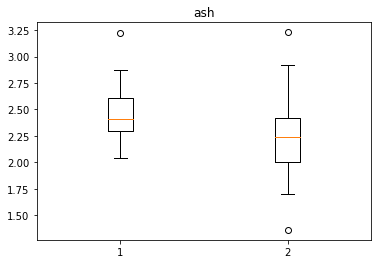

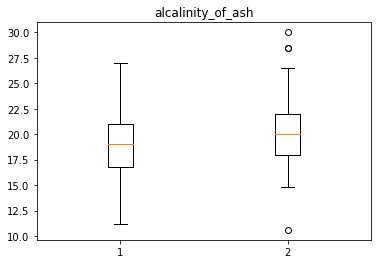

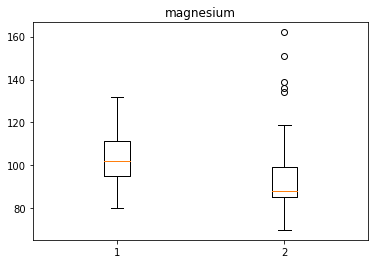

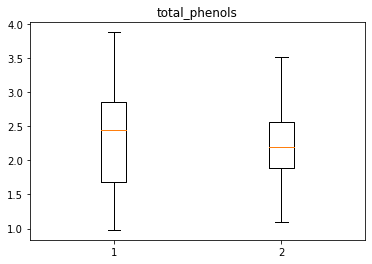

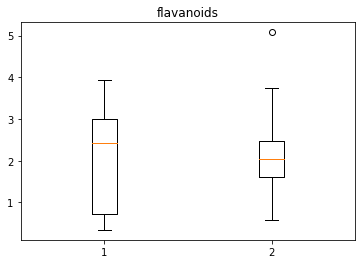

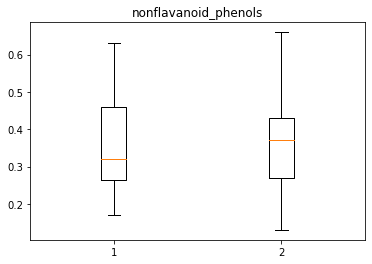

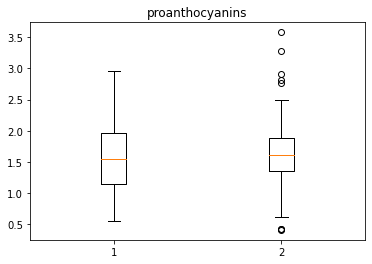

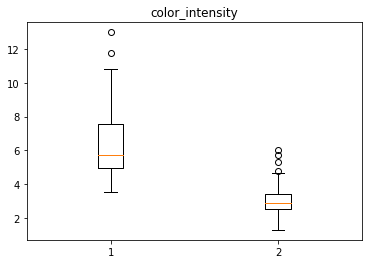

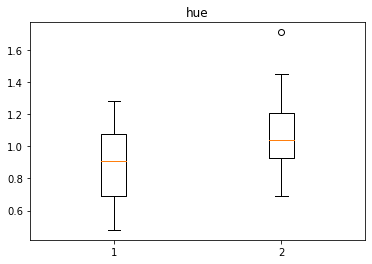

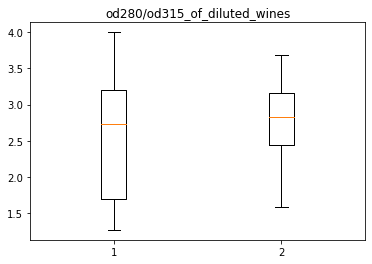

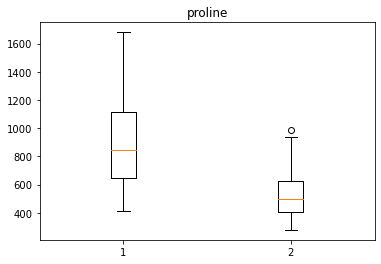

In [143]:
for col in X.columns:
    col_vals = []
    for y_val in [0,1]:
        col_vals.append(X[col][y == y_val])
        #Toma los datos de la columna y filtralo para cuando el target sea 1 o 0
        
    plt.figure()
    plt.title(col)
    plt.boxplot(col_vals)
#Fijese en los graficos, nótese como conocer color intensitie tiene un poder discriminatorio importante.
#Si los boxplot no estan superpuestos es una buena variable discriminatoria (gano info)

Veremos el modelo de DecisionTree

In [144]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

Veo la documentación

In [145]:
DecisionTreeClassifier?

Observamos como se usa en Criterion y Gini, entropy mide la funcion de la calidad de un corte. Son muy parecidos al ¨information game¨, definamos criterion como = a entropy

In [146]:
#dt = DecisionTreeClassifier(criterion='entropy')

In [147]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth = 1)

Cuanto mas bajo en el arbol menos datos mantengo. 

In [148]:
dt.fit(X,y) # entreno, hay muy pocos datos por lo que sera muy rápido

DecisionTreeClassifier(criterion='entropy', max_depth=1)

En este caso estoy entrenando con el 100% de los datos mayormente porque el data set es pequeño. 

[Text(418.5, 326.15999999999997, 'color_intensity <= 3.46\nentropy = 0.97\nsamples = 178\nvalue = [107, 71]'),
 Text(209.25, 108.72000000000003, 'entropy = 0.0\nsamples = 55\nvalue = [0, 55]'),
 Text(627.75, 108.72000000000003, 'entropy = 0.558\nsamples = 123\nvalue = [107, 16]')]

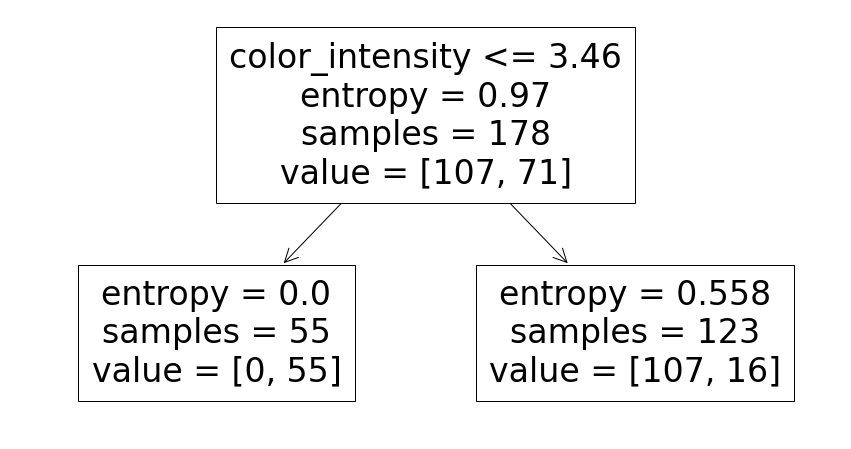

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=X.columns)

En el primer NODO (La raiz): 178 samples que es la cantidad de ejemplos hay de cada clase. El corte incial ocurre en la variable flavanoids, la variable que el modelo definio como relevante, si es menor va a la entropy=1 si es mayor sigue el camino de entropy =0.771. Asi para cada uno de los cortes y sus respectivas variables, que el algoritmo propiamente ha decidido.  Fijese que al final del arbol, a medida que es mas profoundo la relevancia estadistica es nula, ya que hay casos de muestra entre 1,3 o 4 valores. En el primer quiebre hay una discriminación perfecta entre la clase 1 y 3. 

In [150]:
# Roc y roc_auc estan definidas estictamente para problematicas binarias
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, f1_score

In [151]:
f1_score?
#F1 = 2 * (precision * recall) / (precision + recall)

In [152]:
#Un ejemplo que predice un verdadero positivo
dt.predict([X.iloc[1]])#me predice que es un cero

array([0])

In [153]:
y.iloc[1]

0

Efectivamente es un cero. Es un verdadero positivo (para la clase 0) y un verdadero negativo (para clase 1 y 2)

Veamos si hay algun error:

In [154]:
preda = dt.predict(X)

In [155]:
(y == preda).sum()

162

[Text(418.5, 398.64, 'color_intensity <= 3.46\nentropy = 0.97\nsamples = 178\nvalue = [107, 71]'),
 Text(279.0, 326.15999999999997, 'entropy = 0.0\nsamples = 55\nvalue = [0, 55]'),
 Text(558.0, 326.15999999999997, 'proline <= 717.0\nentropy = 0.558\nsamples = 123\nvalue = [107, 16]'),
 Text(418.5, 253.67999999999998, 'hue <= 0.97\nentropy = 0.877\nsamples = 54\nvalue = [38, 16]'),
 Text(279.0, 181.2, 'flavanoids <= 1.58\nentropy = 0.378\nsamples = 41\nvalue = [38, 3]'),
 Text(139.5, 108.71999999999997, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(418.5, 108.71999999999997, 'alcohol <= 13.145\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(279.0, 36.23999999999995, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(558.0, 36.23999999999995, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(558.0, 181.2, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(697.5, 253.67999999999998, 'entropy = 0.0\nsamples = 69\nvalue = [69, 0]')]

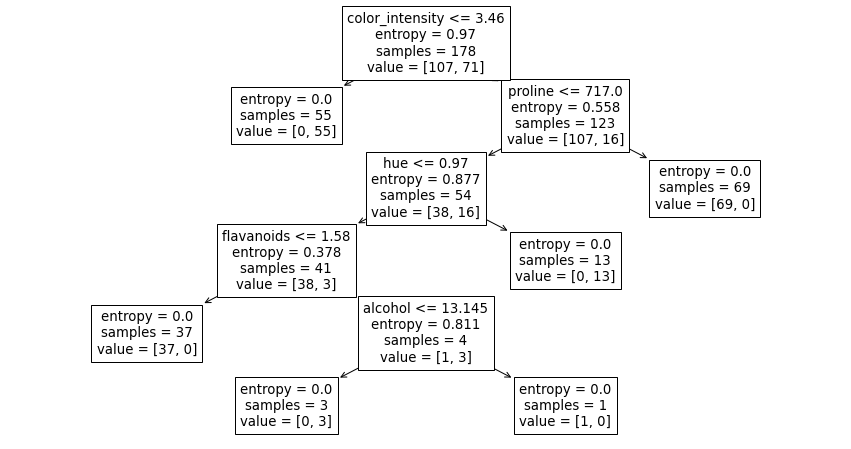

In [156]:
#caso1
#dt = DecisionTreeClassifier(criterion='entropy', max_depth=1)
#caso2
dt = DecisionTreeClassifier(criterion='entropy') #clasificas la problematica para que quede binaria.

dt.fit(X,y)
plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=X.columns)

En el caso 1 las predicciones no son perfectas, mientras que en el caso 2 las predicciones daran perfectas no puede encontrar un ejemplo donde se equivoque, pero aun asi hay desisiones basadas en 4 ejemplos, por lo que no tienen la confianza suficiente. Por lo que hay que determinar si en el modelo hay una señal o si realmente realizo un sobreajuste.

Este modelo seguro que no se equivocara en la clase 0 y 3. 

In [157]:
preda = dt.predict(X)
(y == preda).sum()

178

Nota: The = is a simple assignment operator. It assigns values from right side operands to the left side operand.

While on the other hand == checks if the values of two operands are equal or not. If yes, the condition becomes true and it returns a non zero value.

Revisemos predicciones:

In [186]:
(y == preda).tolist().index(False) #transformo en una lista y pido que me diga el primer fasle. Se que el ejemplo 59 no funciona

24

In [159]:
preda[59]

1

In [160]:
y.iloc[59]

1

Predijo 2 cuando en realidad es 1. Es un falso posito para la clase 2 y un falso negativo para la clase 1

# Metricas

In [161]:
f1_score?

``'micro'``:
        Calculate metrics globally by counting the total true positives,
        false negatives and false positives.

`'weighted'``:
        Calculate metrics for each label, and find their average weighted
        by support (the number of true instances for each label). This
        alters 'macro' to account for label imbalance; it can result in an
        F-score that is not between precision and recall. Calula las metricas recall... depende del caso en la cantidad de datos si pesa menos o no en el promedio. 

In [162]:
f1_score(y, dt.predict(X), average = 'weighted')

1.0

In [163]:
prec = precision_score(y, dt.predict(X), average = 'weighted')
prec

1.0

In [164]:
rec = recall_score(y, dt.predict(X), average = 'weighted')
rec

1.0

In [165]:
2 * prec * rec / (prec + rec) #No da igual porque no es extricatmente binaria el weigthed

1.0

## Un ejemplo BINARIO

In [166]:
f1_score(y, dt.predict(X))

1.0

In [167]:
prec = precision_score(y, dt.predict(X))
prec

1.0

In [168]:
rec = recall_score(y, dt.predict(X))
rec #Si o si tiene que ser mas bajo que 0.87 para que la cuenta de correcta

1.0

In [169]:
2 * prec * rec / (prec + rec)

1.0

Sin el average whated la cuenta es correcta. 

#### Calcululo de la curva Roc y el area debajo de la cueva:

En terminos secillos, cuanto mas próximo a un angulo de 90º, mas próximo a una clasificación perfecta del modelo. Lo cual quivale tambén a una mayor area por debajo de la cuerva. 

In [170]:
dt.predict_proba(X)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [171]:
dt.predict_proba(X).shape

(178, 2)

Te devuelve un array(matriz) que va a tener tantas filas como cantidad de ejemplos totales del dataset (107 + 71) y tiene dos columnas, refiere a la probabilidad de ser cada una de las clases (0 y 1). En otras palabras, la suma de cada uno de los datos de cada fila daran siempre 1

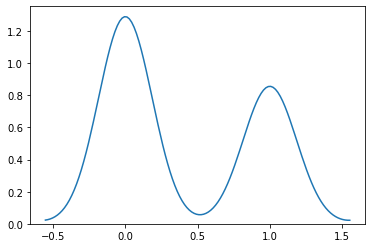

In [172]:
import seaborn as sns
y_score = dt.predict_proba(X)[:,1]
#Forma para quedarme con la probabilidad de clase 1
#sns.distplot(y_score)
sns.distplot(y_score, hist = False)

Se aprecia una distibución bimodal en referencia a las dos clases. 

In [173]:
roc_curve?
fpr, tpr, thresholds = roc_curve(y, y_score)

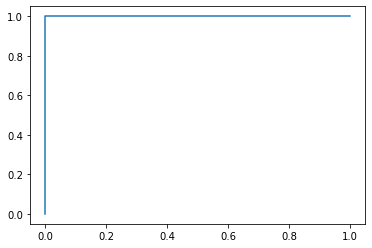

In [174]:
plt.plot(fpr,tpr)

In [175]:
thresholds

array([2., 1., 0.])

El modelo no tiene mucha riqueza en la curva ROC, si caes en la rama derecha 16/(107+16) = 0.13 (cual es la proporción de ese nodo mientras que en la otra rama dice 1.

In [176]:
roc_auc_score(y, y_score)

1.0

El indicador más utilizado en muchos contextos es el área bajo la curva ROC o AUC. Este índice se puede interpretar como la probabilidad de que un clasificador ordenará o puntuará una instancia positiva elegida aleatoriamente más alta que una negativa. El buen orden de los casos de éxito. 

score(ejemplo1)>score(ejemplo2)
y_1 = 1, y_2 = 2 

La curva ROC se puede usar para generar estadísticos que resumen el rendimiento (o la efectividad, en su más amplio sentido) del clasificador. A continuación se proporcionan algunos:

*El punto de inserción de la curva ROC con la línea convexa a la línea de discriminación.
*El área entre la curva ROC y la línea de convexo-paralela discriminación.
*El área bajo la curva ROC, llamada comúnmente AUC (Área Bajo la Curva). También se puede encontrar denominada A' (“a-prima”), o el estadístico 'c' (c-statistic).

# REGRESIÓN LOGÍSTICA

In [177]:
from sklearn.linear_model import LogisticRegression
#LogisticRegression?
lr = LogisticRegression()
lr.fit(X,y)

C:\Users\raul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [178]:
preda = lr.predict(X)

In [179]:
prec = precision_score(y, preda)
prec

0.9436619718309859

In [180]:
rec = recall_score(y, preda)
rec #Si o si tiene que ser mas bajo que 0.87 para que la cuenta de correcta

0.9436619718309859

In [181]:
2 * prec * rec / (prec + rec)

0.9436619718309859

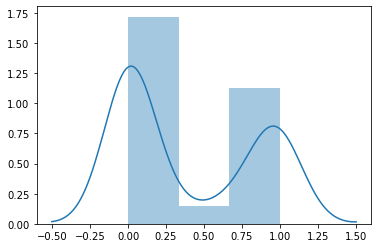

In [182]:
import seaborn as sns
y_score = lr.predict_proba(X)[:,1]
#Forma para quedarme con la probabilidad de clase 1
#sns.distplot(y_score)
sns.distplot(y_score)

In [183]:
set(y_score)# miremos el conjunto de distintos valores

{4.73379286952338e-09,
 7.723769082409709e-08,
 1.0236498659937406e-07,
 3.016506483442043e-07,
 6.652579468004911e-07,
 7.240992578463219e-07,
 8.299840183356509e-07,
 9.915352047509984e-07,
 1.0379413107480122e-06,
 1.200869684364459e-06,
 1.7957159225216075e-06,
 2.3684089798394077e-06,
 2.7696572788789514e-06,
 3.226812521963687e-06,
 5.760577486122825e-06,
 6.615773549712599e-06,
 7.39323793668736e-06,
 7.939558925040285e-06,
 9.933628768834143e-06,
 1.0750882994615638e-05,
 2.198004375224297e-05,
 2.3862489439894205e-05,
 2.4118528588916705e-05,
 2.5967365759652885e-05,
 3.072820545042595e-05,
 3.231515021100068e-05,
 4.057180076588077e-05,
 5.5973267700076144e-05,
 5.6022305069472105e-05,
 5.902080775064386e-05,
 6.387761994394638e-05,
 6.454582320473425e-05,
 0.0001092896932467839,
 0.00011571101490842561,
 0.00012952021024106728,
 0.0001322204274628334,
 0.000134899866373776,
 0.00014744526608582938,
 0.00016629911212713127,
 0.00018560122857194723,
 0.00019968311932375683,
 0

In [184]:
#roc_curve?
fpr, tpr, thresholds = roc_curve(y, y_score)

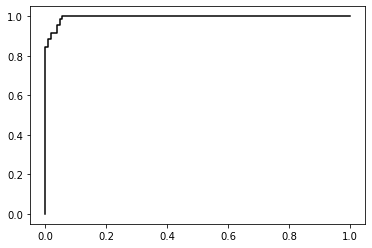

In [185]:
plt.plot(fpr, tpr,'-0')

El modelo ya conoce estos datos por eso se obtiene una curva ROC 'tan buena'

En resumen, este script es un bosquejo de como funciona el modelo de 'Desision Tree' y observar como funcionan las metricas, tomando un ejemplo de dataset que ofrece la libreria: sklearn.datasets.